In [1]:
import pandas as mypanda
from scipy import stats
import matplotlib.pyplot as myplot
from statsmodels.formula.api import ols

In [2]:
myData=mypanda.read_csv('vocation_dummy_Reg.csv')
myData

,SL No,Gender,Income,Attitude
0,1,1,1,2
1,2,1,1,3
2,3,1,1,1
3,4,1,1,1
4,5,1,1,2
5,6,1,2,4
6,7,1,2,5
7,8,1,2,5
8,9,1,2,6
9,10,1,2,6


In [3]:
gender=myData.Gender
income=myData.Income
attitude=myData.Attitude

##### Use box plot instead of scatterplot in dummy 

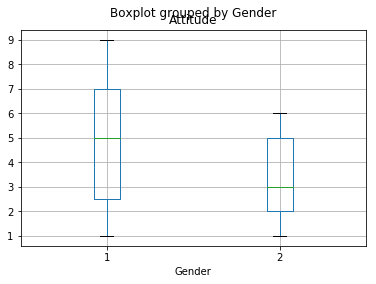

In [4]:
myData.boxplot(column='Attitude', by='Gender')
myplot.show()

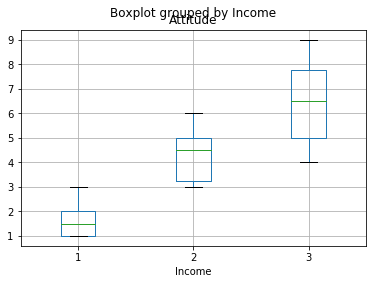

In [5]:
myData.boxplot(column='Attitude', by='Income')
myplot.show()

In [6]:
mymodel=ols('attitude ~ C(gender)+C(income)',myData).fit()

In [7]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               attitude   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     53.37
Date:                Sun, 08 Apr 2018   Prob (F-statistic):           3.02e-11
Time:                        23:24:05   Log-Likelihood:                -37.916
No. Observations:                  30   AIC:                             83.83
Df Residuals:                      26   BIC:                             89.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4000      0.336      7.145      0.000       1.710       3.090
C(gender)[T.2]    -1.6000      0.336     -4.763      0.000      -2.290      -0.910
C(income)[T.2]     2.8000      0.411      6.806      0.000       1.954       3.646
C(income)[T.3]     4.8000      0.411     11.668      0.000       3.954       5.646
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.615
Skew:                           0.089   Prob(JB):                        0.735
Kurtosis:                       2.322   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
pred=mymodel.predict()
pred

array([ 2.4,  2.4,  2.4,  2.4,  2.4,  5.2,  5.2,  5.2,  5.2,  5.2,  7.2,
        7.2,  7.2,  7.2,  7.2,  0.8,  0.8,  0.8,  0.8,  0.8,  3.6,  3.6,
        3.6,  3.6,  3.6,  5.6,  5.6,  5.6,  5.6,  5.6])

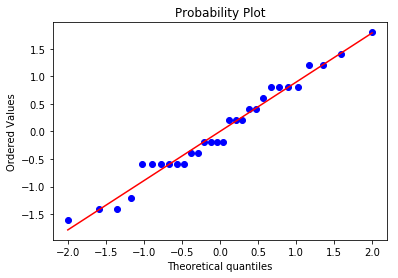

In [9]:
res=attitude-pred
stats.probplot(res,plot=myplot)
myplot.show()

In [10]:
stats.normaltest(res)

NormaltestResult(statistic=0.52111989611555032, pvalue=0.7706199578215539)

In [11]:
from statsmodels.stats.anova import anova_lm
anova_table = anova_lm(mymodel)
anova_table

C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,19.200000,19.200000,22.690909,6.274380e-05
C(income),2.0,116.266667,58.133333,68.703030,4.189551e-11
Residual,26.0,22.000000,0.846154,NaN,NaN
